In [ ]:
# imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,  Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import gensim

In [ ]:
#download the dataset
!mkdir /content/files
os.chdir('/content/files')
!gdown 1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut
!gdown 1O1d32HU9bKvvqLill5ogDFdQ0e5rMvOx
!gdown 1AanuBUBAYigNQn0h8iLA1Z096I-S9UqZ
!gdown 1LiqDEFRRofNNNjUrcy770sKXzUAeYawA
!gdown 1RjJ8IHWCmU65sRTPfAUyXTR3kTZ7ez2y
!gdown 18bXJWtYQgjWFyepsj-Vc-Hwuf-NdUsKQ
!unzip x_val.zip
!unzip x_test.zip
!unzip x_train.zip
!unzip y_test.zip
!unzip y_train.zip
!unzip y_val.zip



mkdir: cannot create directory ‘/content/files’: File exists
Downloading...
From (original): https://drive.google.com/uc?id=1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut
From (redirected): https://drive.google.com/uc?id=1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut&confirm=t&uuid=6fe04cad-dd19-4e70-8f11-6f50b447cd05
To: /content/files/x_train.zip
100% 121M/121M [00:02<00:00, 60.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O1d32HU9bKvvqLill5ogDFdQ0e5rMvOx
To: /content/files/x_test.zip
100% 6.74M/6.74M [00:00<00:00, 55.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AanuBUBAYigNQn0h8iLA1Z096I-S9UqZ
To: /content/files/x_val.zip
100% 6.76M/6.76M [00:00<00:00, 47.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LiqDEFRRofNNNjUrcy770sKXzUAeYawA
To: /content/files/y_val.zip
100% 154k/154k [00:00<00:00, 5.79MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RjJ8IHWCmU65sRTPfAUyXTR3kTZ7ez2y
To: /content/files/y_train.zip
100% 2.74M/2.74M [00:00<00:00, 24.6MB/s]
Downloading

In [ ]:
x_val = pd.read_csv('/content/files/x_val.csv')
#look at data information
num_rows = x_val.shape[0]
print(num_rows)
print(x_val.columns)
x_train = pd.read_csv('/content/files/x_train.csv')
num_rows = x_train.shape[0]
print(num_rows)
print(x_train.columns)
x_test = pd.read_csv('/content/files/x_test.csv')
num_rows = x_test.shape[0]
print(num_rows)
print(x_test.columns)
y_val = pd.read_csv('/content/files/y_val.csv')
num_rows = y_val.shape[0]
print(num_rows)
print(y_val.columns)
y_train = pd.read_csv('/content/files/y_train.csv')
num_rows = y_train.shape[0]
print(num_rows)
print(y_train.columns)
y_test = pd.read_csv('/content/files/y_test.csv')
num_rows = y_test.shape[0]
print(num_rows)
print(y_test.columns)
y_train = y_train.drop(columns=['Unnamed: 0'], errors = 'ignore')
y_test = y_test.drop(columns=['Unnamed: 0'], errors = 'ignore')
y_val = y_val.drop(columns=['Unnamed: 0'], errors ='ignore')

12743
Index(['Unnamed: 0', 'log_days_difference', 'log_likes_per_day',
       'log_dislikes_per_day', 'log_comments_per_day', 'trending_count',
       'days_difference', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'desc_0',
       'desc_1', 'desc_2', 'desc_3', 'desc_4', 'desc_5', 'desc_6', 'desc_7',
       'desc_8', 'desc_9', 'desc_10', 'desc_11', 'desc_12', 'desc_13',
       'desc_14', 'desc_15', 'desc_16', 'desc_17', 'desc_18', 'desc_19',
       'desc_20', 'desc_21', 'desc_22', 'desc_23', 'title_1', 'title_2',
       'title_3', 'title_4', 'title_5', 'title_6', 'title_7', 'title_8',
       'title_9', 'title_10', 'title_11', 'title_12', 'tags0', 'tags1',
       'tags2', 'tags3', 'tags4', 'tags5', 'tags6', '

In [ ]:
tag_columns = [column for column in x_train.columns if column.startswith('tag')]
desc_columns = [column for column in x_train.columns if column.startswith('desc')]
title_columns = [column for column in x_train.columns if column.startswith('title')]
drop_columns = ['Unnamed: 0', 'categoryId'] + tag_columns + desc_columns + title_columns
x_train = x_train.drop(columns=drop_columns, errors = 'ignore')
x_test = x_test.drop(columns=drop_columns, errors = 'ignore' )
x_val = x_val.drop(columns=drop_columns, errors = 'ignore')

print(x_train.head())
print(x_train.columns)

   log_days_difference  log_likes_per_day  log_dislikes_per_day  \
0             1.791759           9.030663              4.231204   
1             1.386294           9.235748              0.000000   
2             1.609438           8.808369              0.000000   
3             1.791759          10.528072              0.000000   
4             1.098612           7.133695              0.000000   

   log_comments_per_day  trending_count  days_difference  month_April  \
0              6.527958               2                5        False   
1              7.567863               1                3        False   
2              6.289716               2                4        False   
3              7.208452               4                5         True   
4              5.141664               0                2        False   

   month_August  month_December  month_February  ...  categoryId_Gaming  \
0         False           False           False  ...              False   
1       

In [ ]:
# Create the  LinearRegression model object
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

#  Make predictions on the test data
prediction = model.predict(x_test)

# The mean squared error
print('\nModel Performance\n\nMSE =   %.2f'
      % mean_squared_error(y_test, prediction))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

MSE =   0.33
 R^2 =   0.72


In [ ]:
model_x_train = x_train[['log_days_difference', 'log_likes_per_day',
       'log_comments_per_day', 'trending_count', 'days_difference',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'categoryId_Autos & Vehicles',
       'categoryId_Comedy', 'categoryId_Education', 'categoryId_Entertainment',
       'categoryId_Film & Animation', 'categoryId_Gaming',
       'categoryId_Howto & Style', 'categoryId_Music',
       'categoryId_News & Politics', 'categoryId_Nonprofits & Activism',
       'categoryId_People & Blogs', 'categoryId_Pets & Animals',
       'categoryId_Science & Technology', 'categoryId_Sports',
       'categoryId_Travel & Events']]
model_x_test = x_test[['log_days_difference', 'log_likes_per_day',
       'log_comments_per_day', 'trending_count', 'days_difference',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'categoryId_Autos & Vehicles',
       'categoryId_Comedy', 'categoryId_Education', 'categoryId_Entertainment',
       'categoryId_Film & Animation', 'categoryId_Gaming',
       'categoryId_Howto & Style', 'categoryId_Music',
       'categoryId_News & Politics', 'categoryId_Nonprofits & Activism',
       'categoryId_People & Blogs', 'categoryId_Pets & Animals',
       'categoryId_Science & Technology', 'categoryId_Sports',
       'categoryId_Travel & Events']]
# Create the  LinearRegression model object
other_model = Ridge(alpha = 0.1)

# Fit the model to the training data
other_model.fit(model_x_train, y_train)

#  Make predictions on the test data
prediction = other_model.predict(model_x_test)

# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % mean_squared_error(y_test, prediction))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.33
 R^2 =   0.72


In [ ]:
#notes: removing one hot encoded dates made it perform similarly

In [ ]:
#find feature importance of the linear regression weights
intercept = other_model.intercept_
coefficient = other_model.coef_[0]

print("Intercept:", intercept)
print("Coefficient:", coefficient)
# Get the feature names
feature_names = x_train[['log_days_difference', 'log_likes_per_day',
       'log_comments_per_day', 'trending_count', 'days_difference',
        'categoryId_Autos & Vehicles',
       'categoryId_Comedy', 'categoryId_Education', 'categoryId_Entertainment',
       'categoryId_Film & Animation', 'categoryId_Gaming',
       'categoryId_Howto & Style', 'categoryId_Music',
       'categoryId_News & Politics', 'categoryId_Nonprofits & Activism',
       'categoryId_People & Blogs', 'categoryId_Pets & Animals',
       'categoryId_Science & Technology', 'categoryId_Sports',
       'categoryId_Travel & Events']].columns

# Print the coefficients and their corresponding features
for feature, coef in zip(feature_names, coefficient):
    print(f'{feature}: {coef}')

Intercept: [6.26258309]
Coefficient: [-0.25075759  0.62926165  0.09402188 -0.01544083  0.06007075  0.03074295
 -0.0528064  -0.01547372  0.02307647  0.00952326  0.00565588  0.01814098
  0.02841458  0.01341907 -0.01833115 -0.01693603 -0.02542588  0.03706791
  0.01506523 -0.03044668  0.05626872 -0.0185012  -0.0470003  -0.01245368
 -0.1361707  -0.32851539 -0.14705719  0.07833915  0.04444281 -0.08518852
 -0.24711344 -0.16273843  0.73068205 -0.06325678 -0.20490249  0.03530237
  0.0552127   0.56517119 -0.13420733]
log_days_difference: -0.2507575910481748
log_likes_per_day: 0.6292616543813028
log_comments_per_day: 0.09402187735997374
trending_count: -0.015440828445530613
days_difference: 0.0600707467243189
categoryId_Autos & Vehicles: 0.03074295010197087
categoryId_Comedy: -0.05280640299269077
categoryId_Education: -0.015473721501641287
categoryId_Entertainment: 0.023076466509765782
categoryId_Film & Animation: 0.009523260799429644
categoryId_Gaming: 0.00565587987820559
categoryId_Howto & Styl

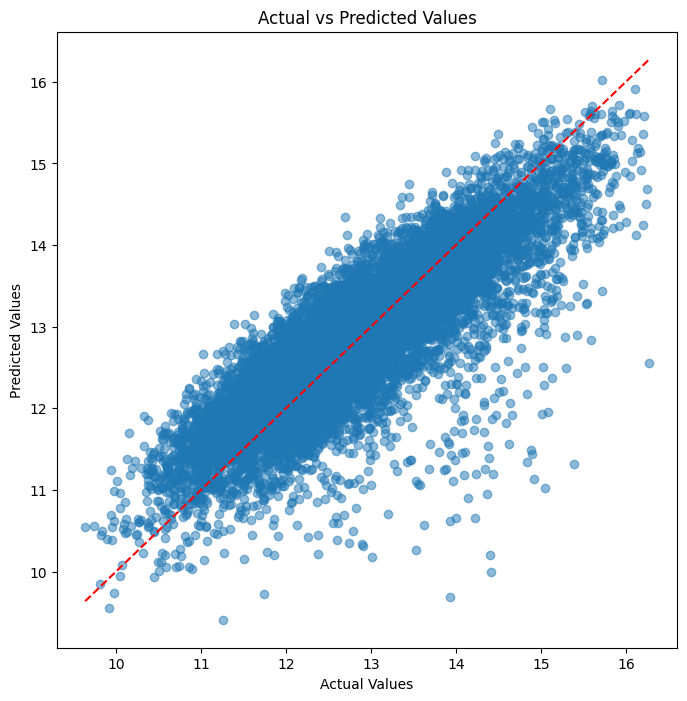

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.show()